<a href="https://colab.research.google.com/github/hucarlos08/Nerf-Geo/blob/main/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

A neural network is a computational model inspired by the way biological neural networks in the human brain process information. It consists of layers of interconnected nodes (neurons), each performing a simple computation. These networks can learn complex patterns and relationships from data, making them powerful tools for tasks such as image recognition, natural language processing, and more.

## Basic Structure

A neural network typically consists of:
- **Input Layer:** Receives the input data.
- **Hidden Layers:** Intermediate layers that process the input data using learned weights and biases.
- **Output Layer:** Produces the final output of the network.

Each neuron in a layer is connected to every neuron in the next layer, and each connection has an associated weight. The neuron applies an activation function to the weighted sum of its inputs to produce an output.

## How Neural Networks Learn

Neural networks learn by adjusting the weights and biases during training. The training process involves:
- **Forward Propagation:** Passing the input data through the network to obtain an output.
- **Loss Calculation:** Comparing the network's output to the true labels using a loss function.
- **Backpropagation:** Updating the weights and biases to minimize the loss by propagating the error backward through the network.

11490434/11490434 [==============================] - 0s 0us/step


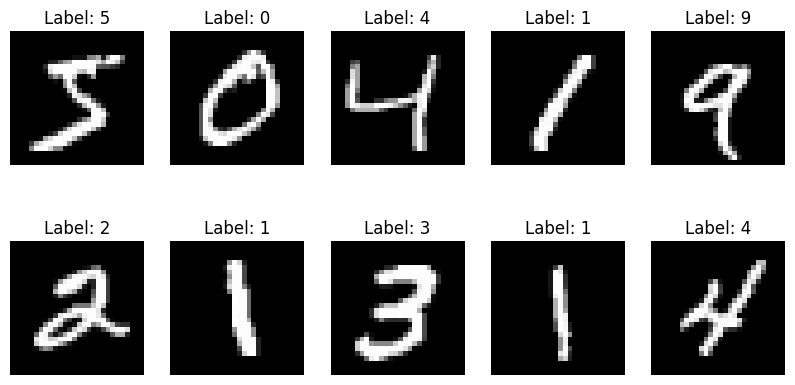

Epoch 1/10
1500/1500 [==============================] - 8s 4ms/step - loss: 0.2656 - accuracy: 0.9215 - val_loss: 0.1523 - val_accuracy: 0.9538
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1109 - accuracy: 0.9662 - val_loss: 0.1059 - val_accuracy: 0.9682
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0768 - accuracy: 0.9762 - val_loss: 0.0938 - val_accuracy: 0.9730
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0550 - accuracy: 0.9828 - val_loss: 0.0897 - val_accuracy: 0.9725
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0439 - accuracy: 0.9858 - val_loss: 0.0955 - val_accuracy: 0.9728
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0354 - accuracy: 0.9883 - val_loss: 0.1005 - val_accuracy: 0.9743
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9896 - val_loss: 0.1011 - val_accuracy:

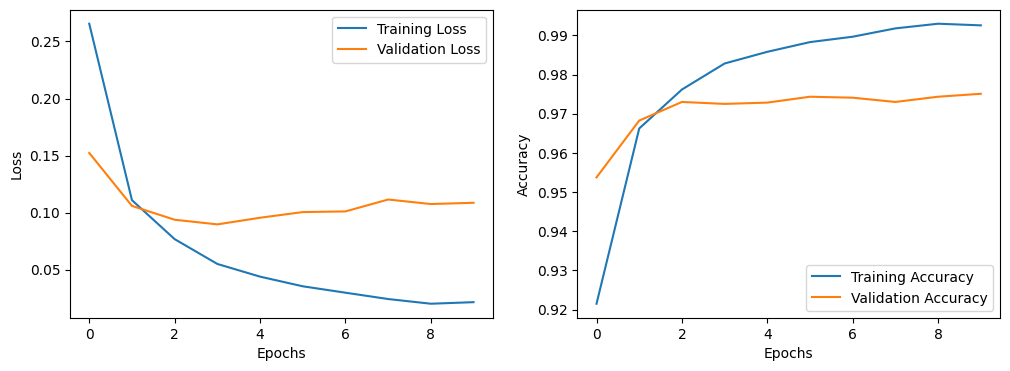

In [1]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train_labels = np.argmax(y_train, axis=1)

# Illustrate the dataset
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train_labels[i]}")
    plt.axis('off')
plt.show()

# Define a simple feedforward neural network
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

313/313 [==============================] - 1s 2ms/step


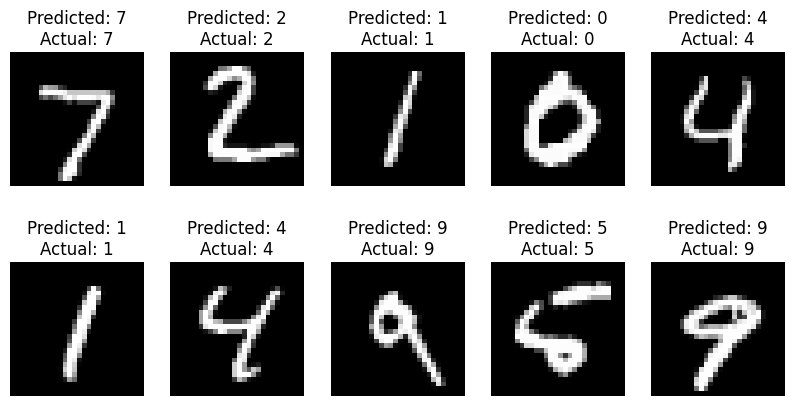

In [3]:
y_test_labels = np.argmax(y_test, axis=1)

predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {predicted_classes[i]}\nActual: {y_test_labels[i]}")
    plt.axis('off')
plt.show()

# Summary and Next Steps

In this notebook, we introduced the basic concepts of neural networks, including their structure, how they learn, and the process of training them. We used a simple feedforward neural network to classify handwritten digits from the MNIST dataset, demonstrating the key principles of forward propagation, loss calculation, and backpropagation.

## Key Concepts
- **Neural Network Structure:** Input layer, hidden layers, and output layer.
- **Activation Functions:** Functions applied to the weighted sum of inputs to produce the output of a neuron.
- **Training Process:** Involves forward propagation, loss calculation, and backpropagation.

## Next Steps
- **Neural Radiance Fields (NeRF):** A recent advancement that represents scenes as neural networks, enabling high-quality view synthesis.